In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns' ,None)
pd.pandas.set_option('display.max_rows' ,None)

#featureengineering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Regressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



#metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/nanthasnk/Customer-Lifetime-Value-Prediction/master/Data/AutoInsurance.csv')

# Profile of the Data

In [91]:
df.shape

(9134, 24)

In [92]:
df.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8927,UQ54273,California,11790.496170,Yes,Basic,College,3/1/2011,Retired,M,25251,Suburban,Divorced,66,13,43,0,2,Personal Auto,Personal L3,Offer2,Web,316.800000,Four-Door Car,Medsize
8828,FP27229,California,3384.468426,No,Extended,College,5/1/2011,Employed,F,54603,Suburban,Single,86,29,68,0,1,Corporate Auto,Corporate L3,Offer1,Agent,412.800000,Four-Door Car,Medsize
8681,BN91755,California,4975.171042,No,Extended,Master,1/30/11,Employed,F,44723,Urban,Married,124,26,3,0,1,Personal Auto,Personal L2,Offer1,Call Center,341.088276,SUV,Medsize
8175,OS84395,Nevada,7611.949286,No,Extended,Bachelor,2/25/11,Employed,M,90252,Rural,Married,95,1,77,0,7,Corporate Auto,Corporate L2,Offer2,Web,122.924197,Four-Door Car,Medsize
2195,PO27978,Oregon,14727.505260,No,Basic,Doctor,2/19/11,Employed,F,97785,Urban,Single,73,35,36,0,2,Personal Auto,Personal L1,Offer1,Call Center,236.614219,Two-Door Car,Medsize


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [94]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,10/1/2011,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


In [95]:
df.duplicated().sum()

0

In [96]:
df[df.duplicated()]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


# Checking Null Values

In [97]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [98]:
columns = df.columns
print(columns)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


# Column Separation

In [99]:
categorical_columns = df.columns[df.dtypes=='object']
numerical_columns = df.columns[df.dtypes !='object']

In [100]:
print(categorical_columns)
print("*"*75)
print(numerical_columns)

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')
***************************************************************************
Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')


# Statistics Based Analysis and Graph Based Analysis

In [101]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [102]:
df[categorical_columns].describe().T

,count,unique,top,freq
Customer,9134,9134,BU79786,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,10/1/2011,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


In [103]:
for i in categorical_columns:
    if i != 'Customer':
        print(i)
        print(df[i].value_counts())
        print("-"*100)

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
----------------------------------------------------------------------------------------------------
Response
No     7826
Yes    1308
Name: Response, dtype: int64
----------------------------------------------------------------------------------------------------
Coverage
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
----------------------------------------------------------------------------------------------------
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
Effective To Date
10/1/2011    195
1/27/11      194
2/14/11      186
1/26/11      181
1/17/11      180
1/19/11      179
1/31/11      

In [104]:
corr = df.corr()
corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


We are showing the Distribution of Numerical Columns and also checking the Outliers of the columns

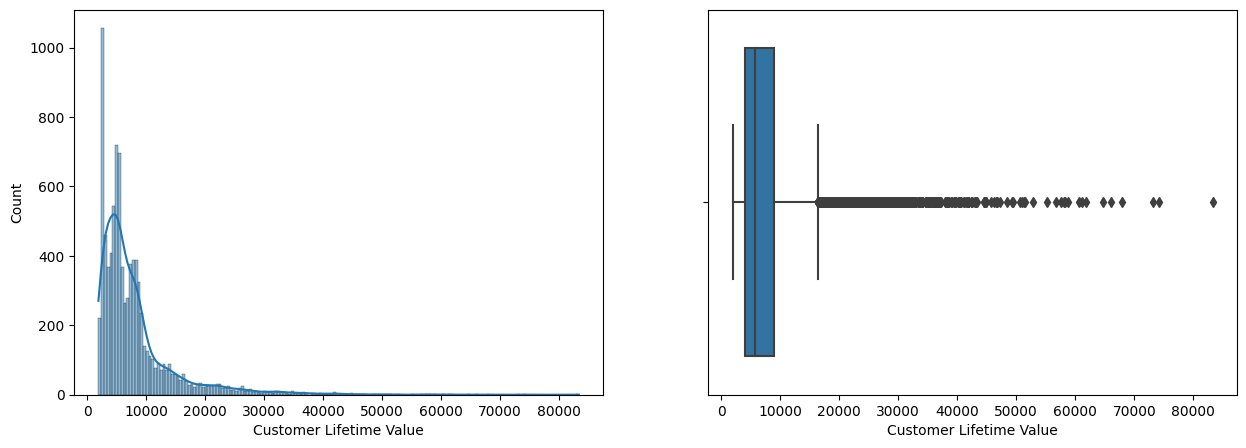

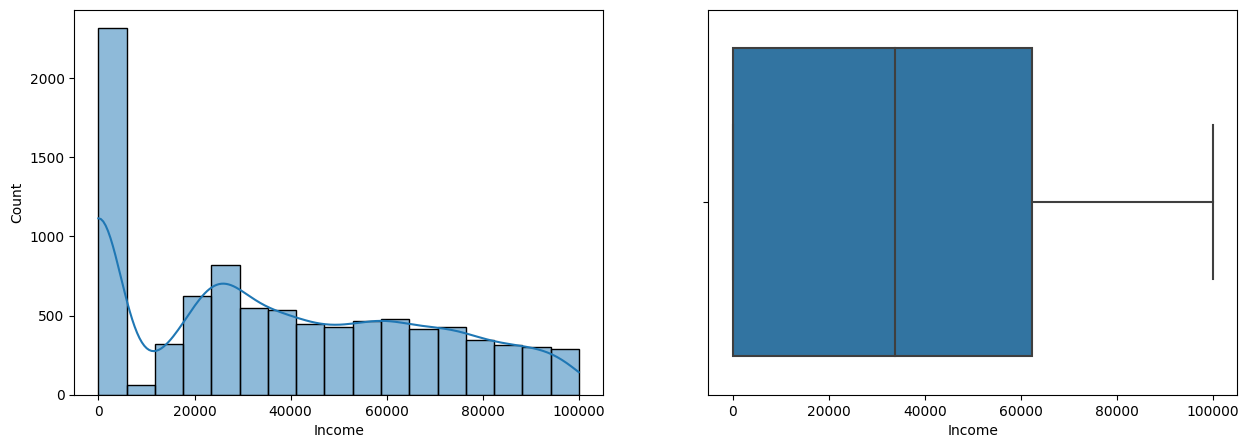

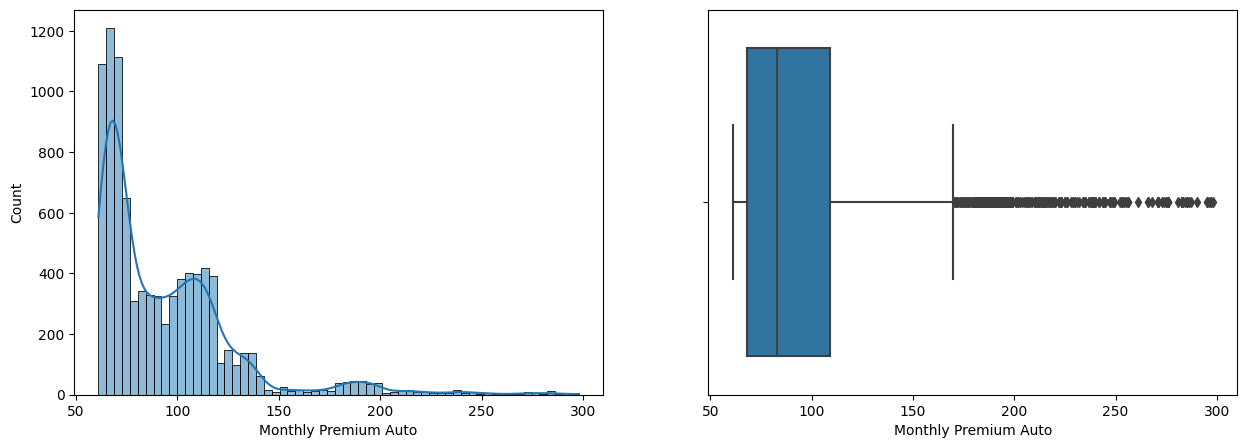

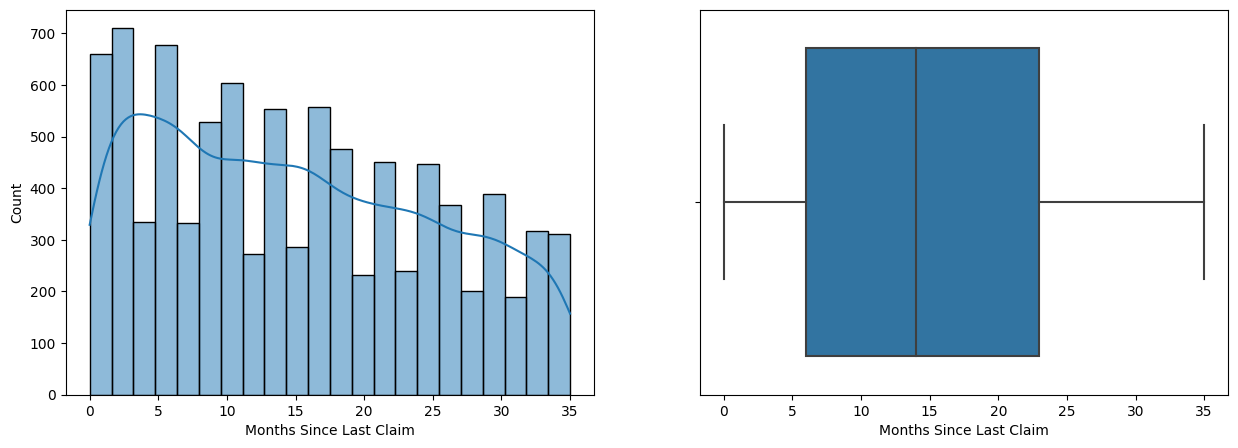

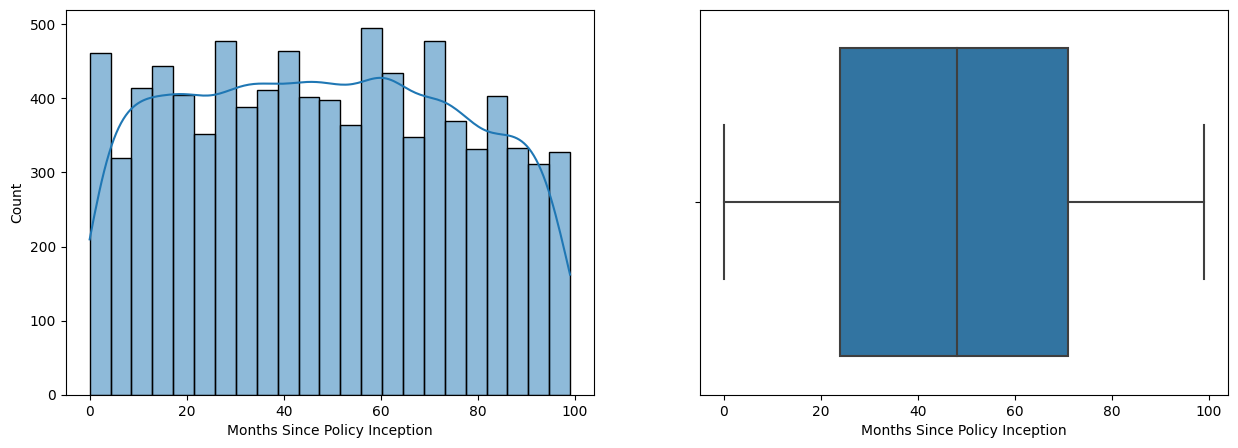

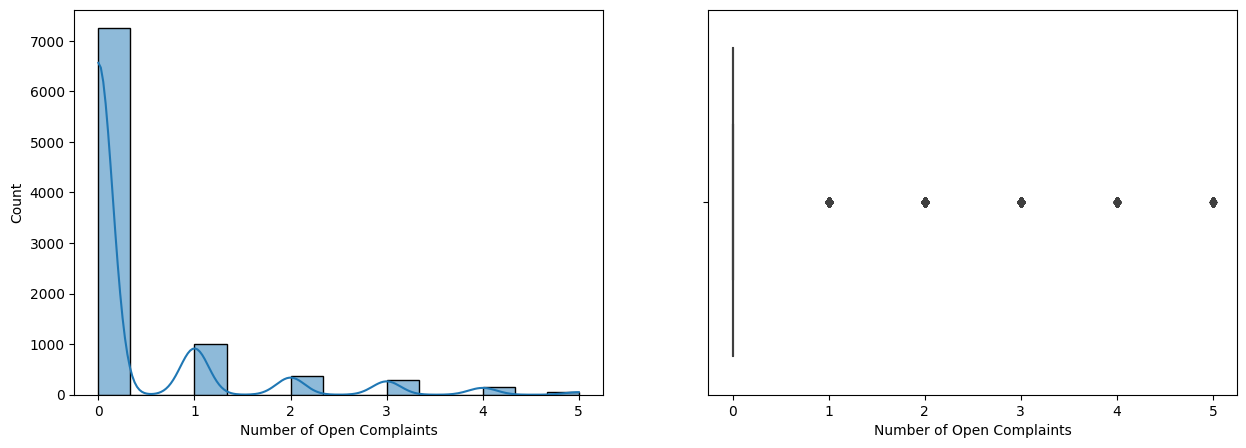

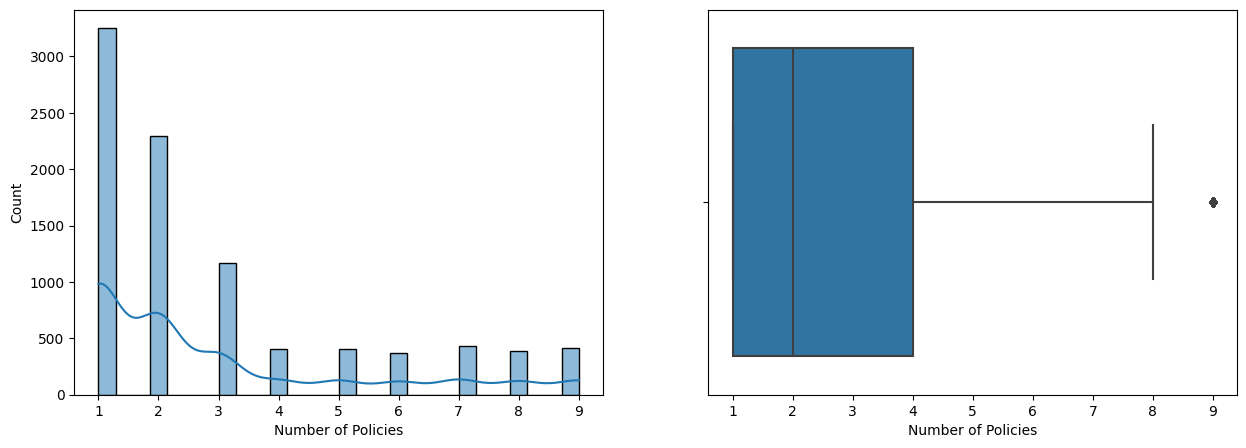

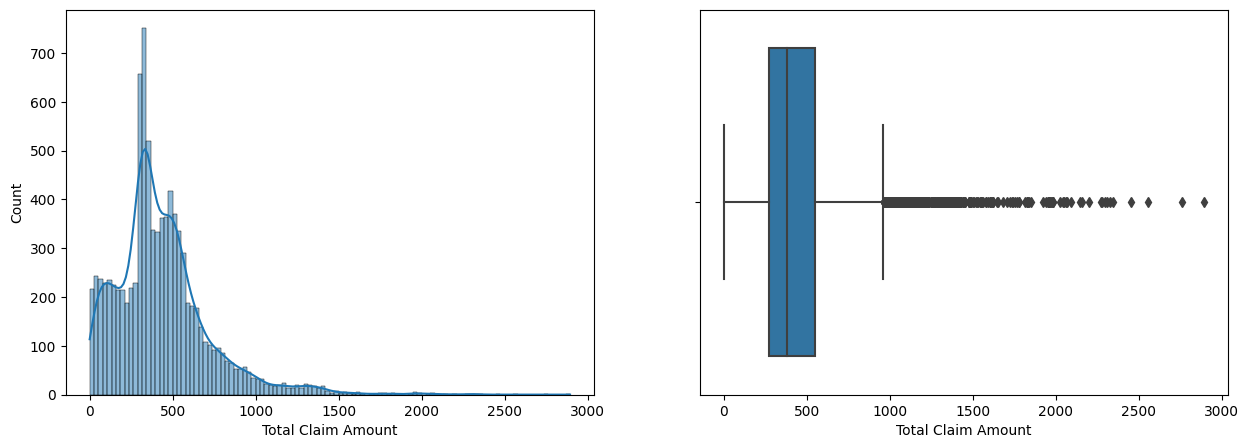

In [105]:
#fig = plt.figure(figsize = (15,5))
for i in numerical_columns:
    fig = plt.figure(figsize = (15,5))
    plt.subplot(121)
    sns.histplot(data=df, x = i, kde=True)
    plt.subplot(122)
    sns.boxplot(x=df[i],data=df)
    print("\n")
    plt.show()

Showing the count of Categorical variables

<Figure size 1000x1000 with 0 Axes>

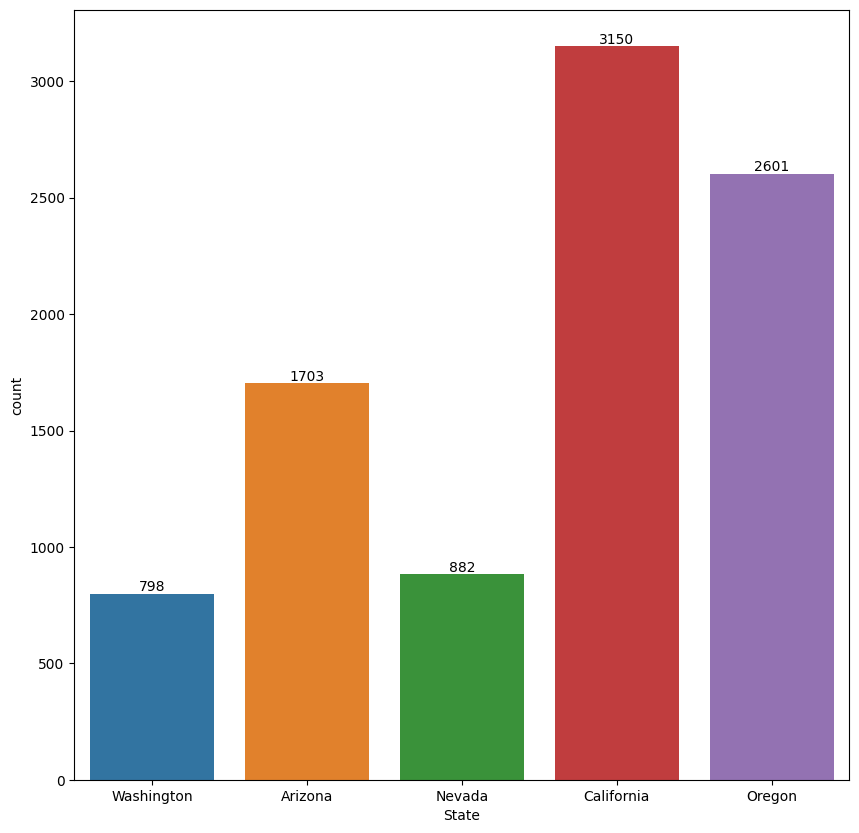

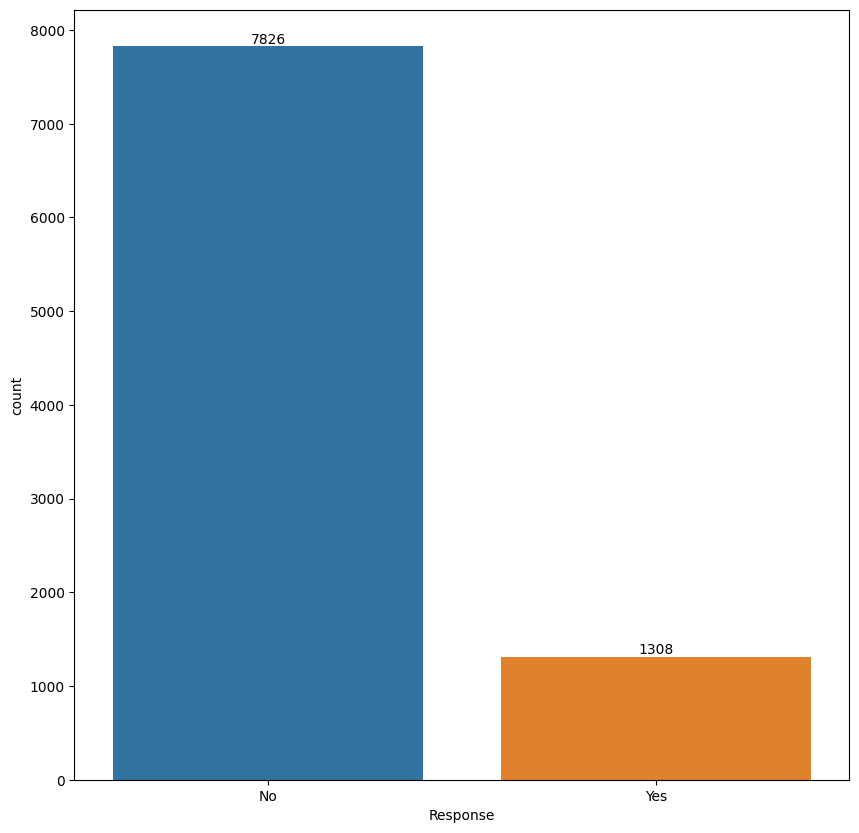

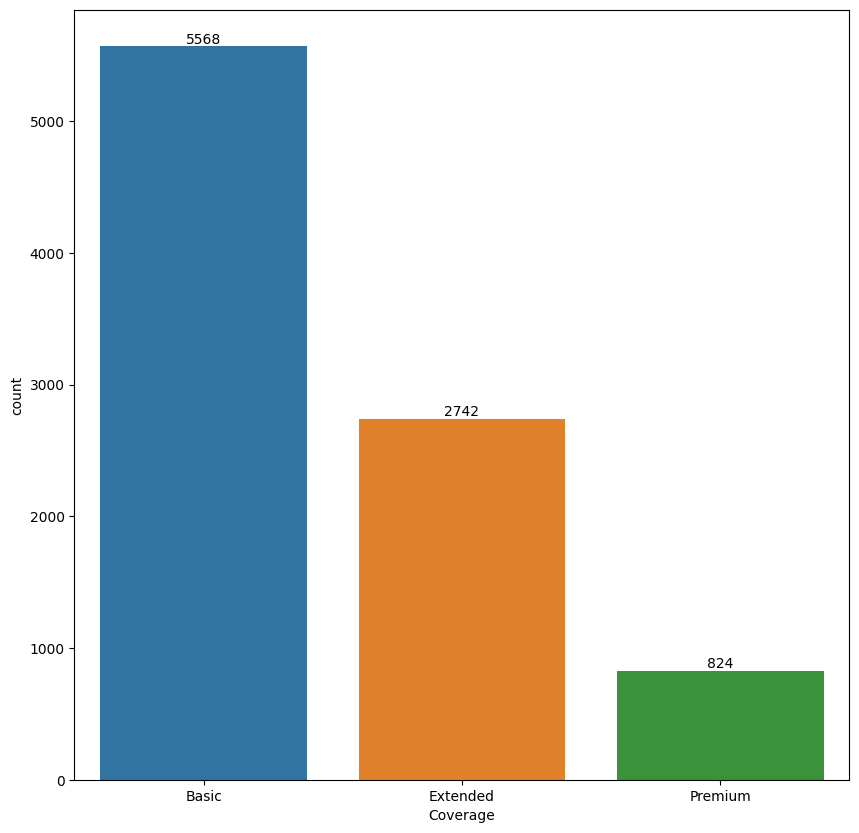

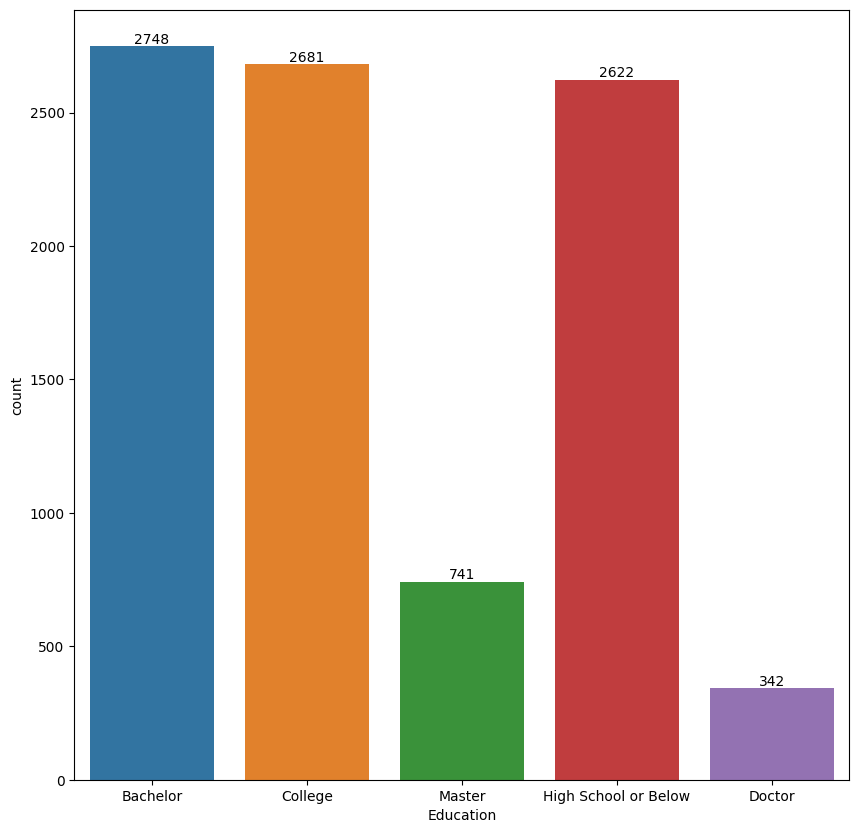

<Figure size 1000x1000 with 0 Axes>

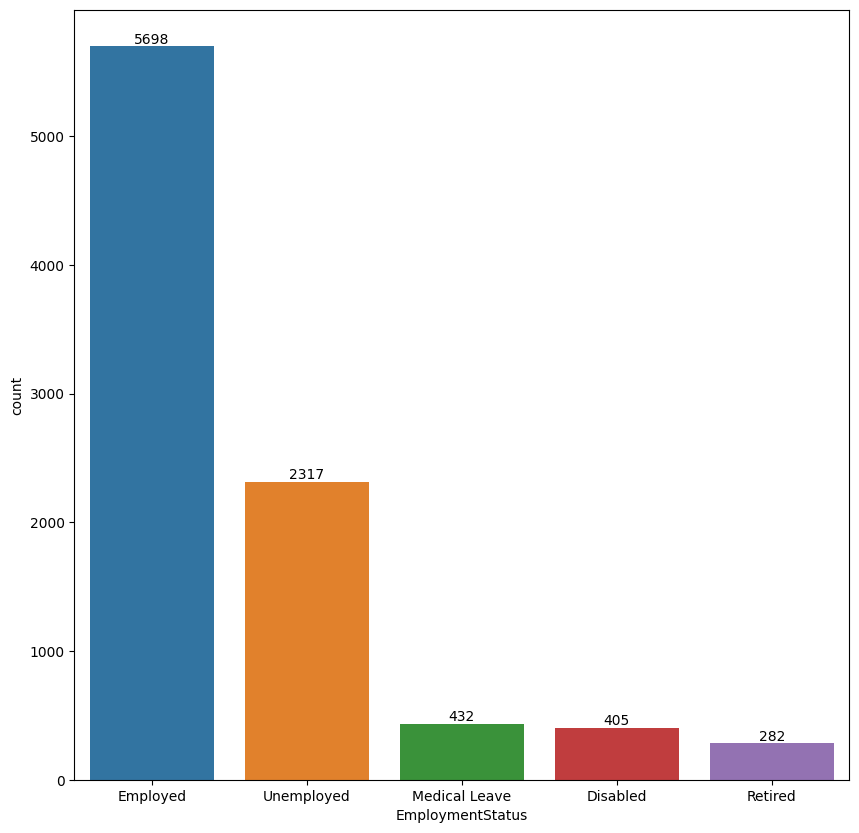

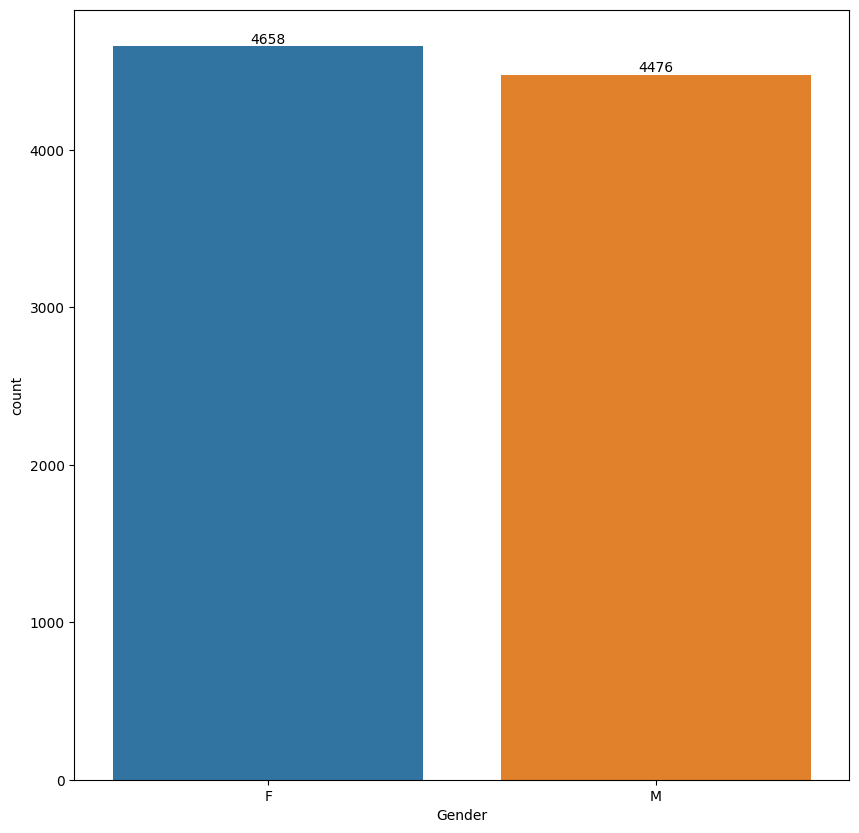

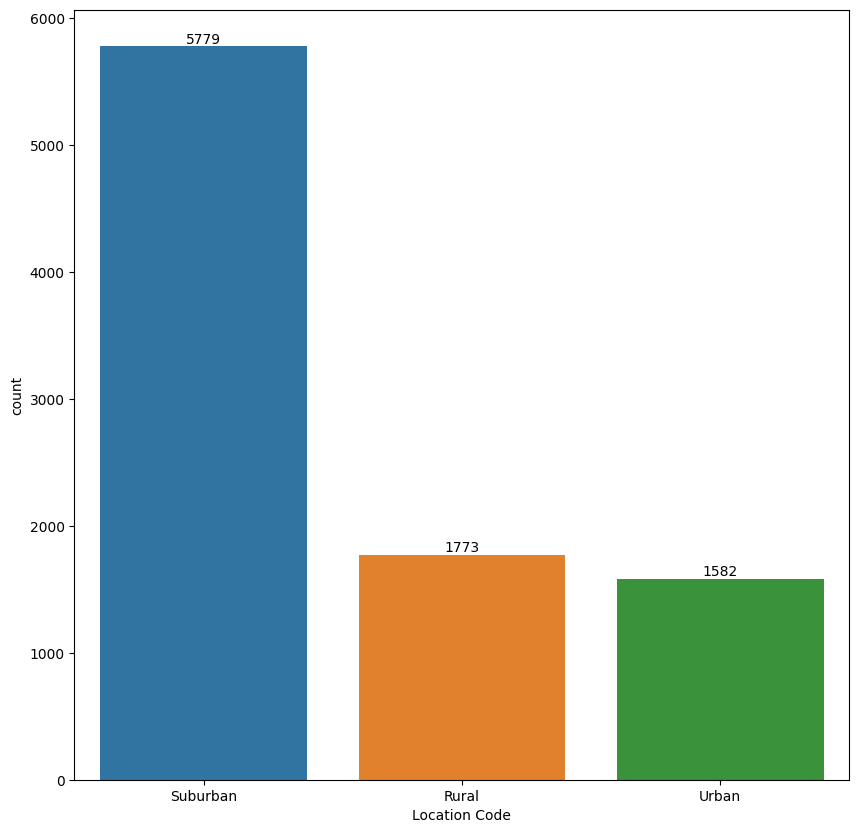

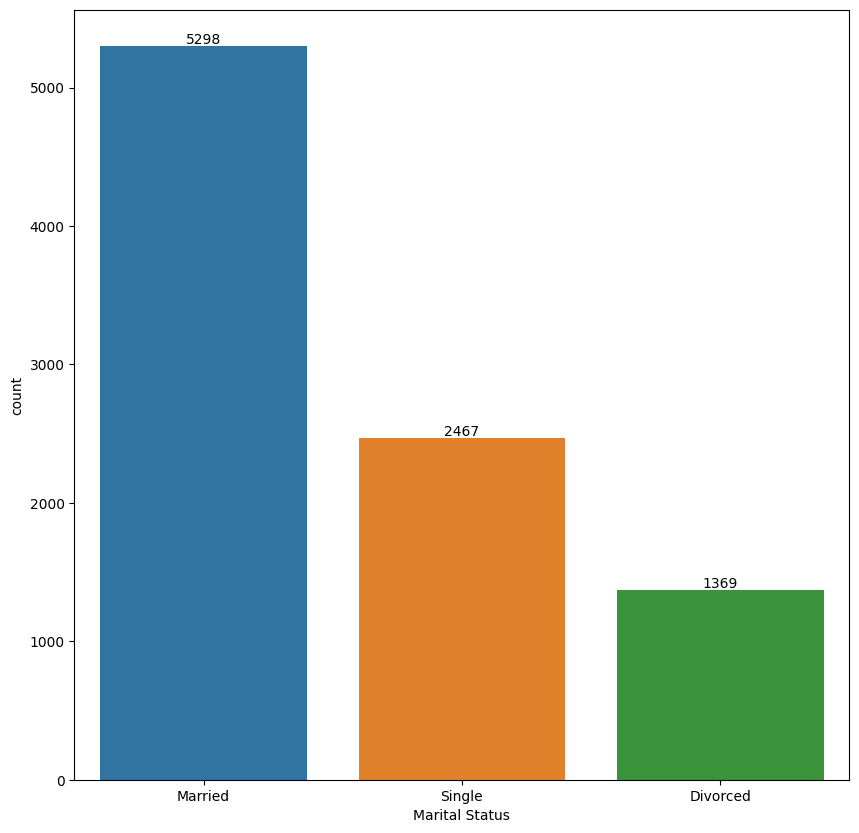

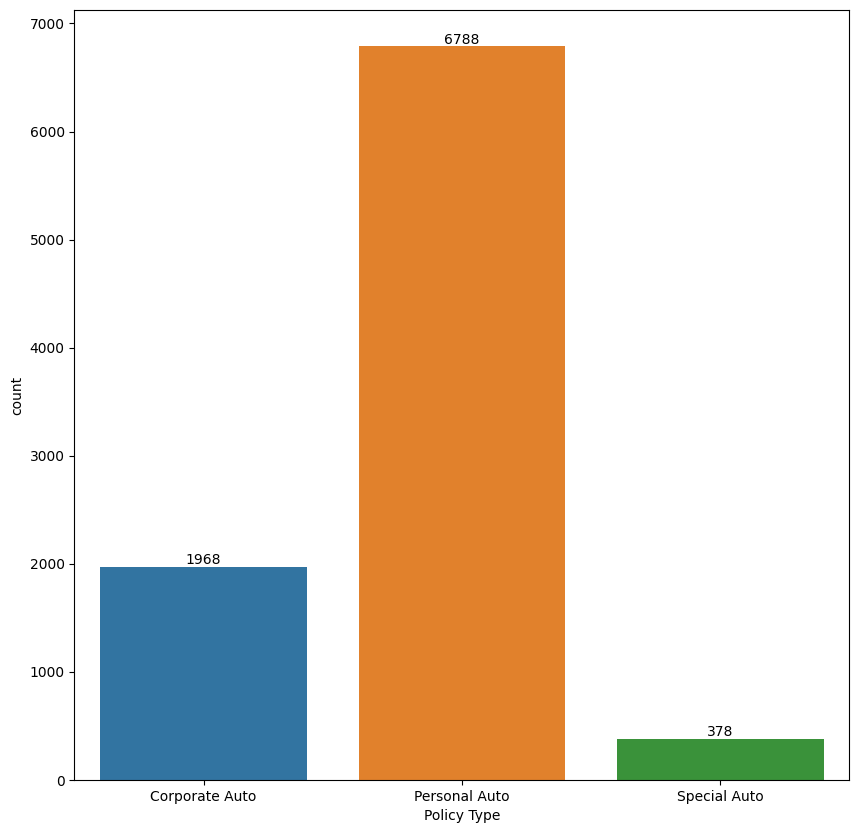

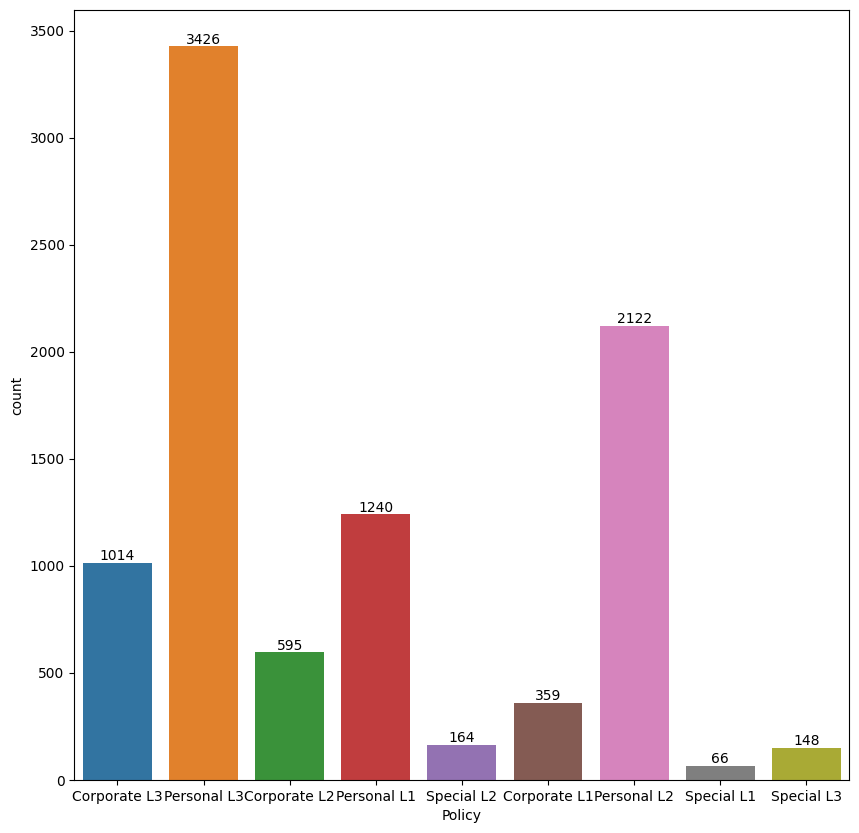

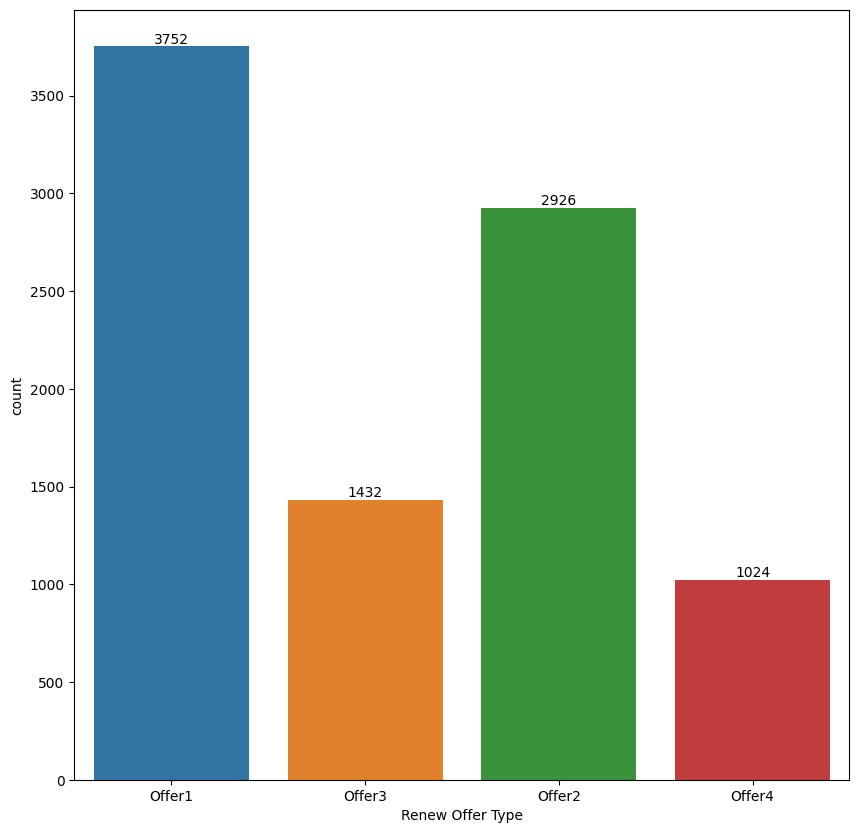

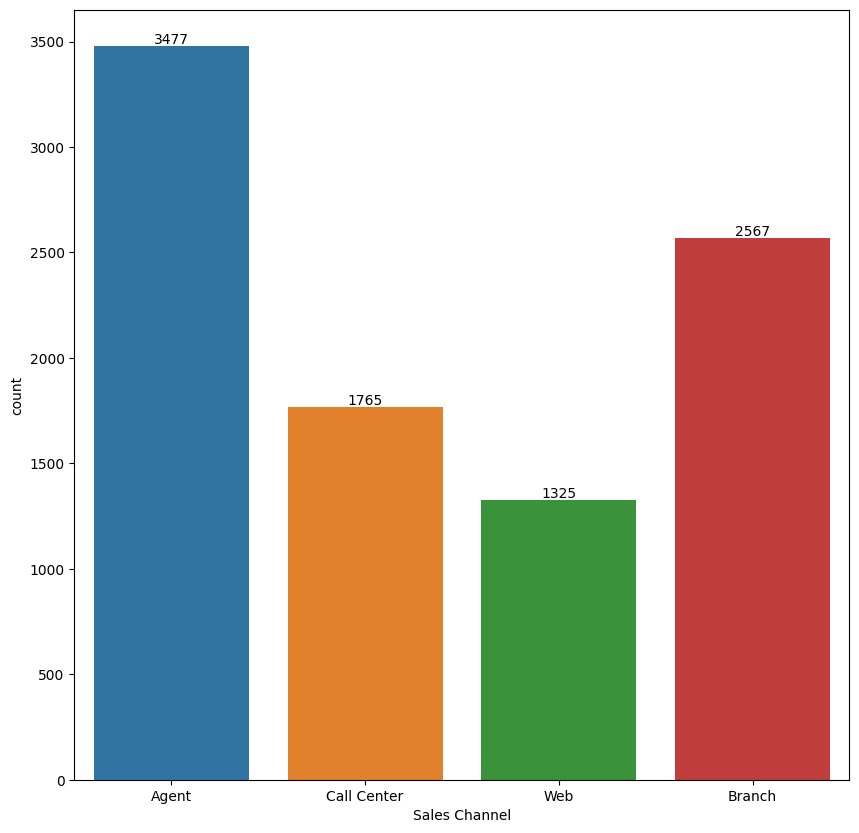

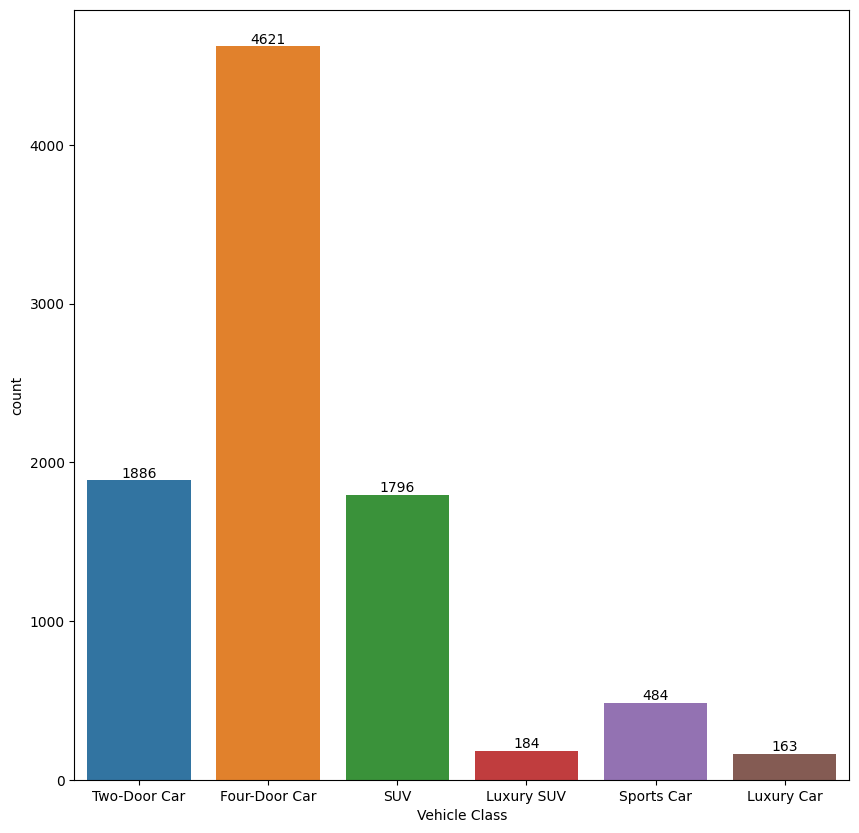

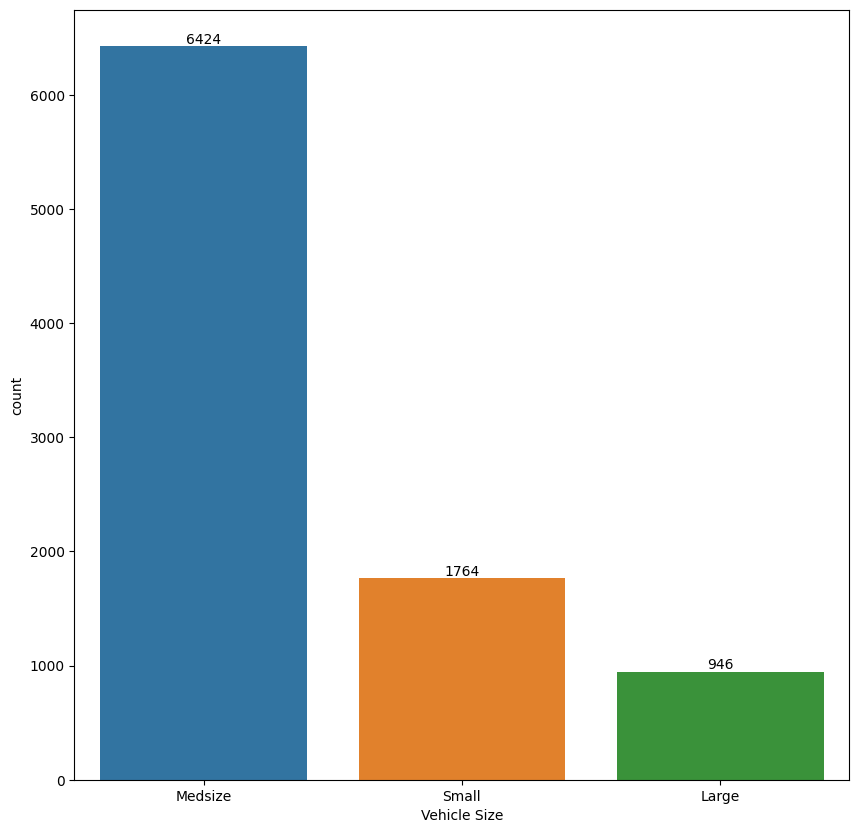

In [106]:

for i in categorical_columns:
    plt.figure(figsize=(10,10))
    if len(df[i].unique()) < 10:
        ax=sns.countplot(data=df, x=i)
        ax.bar_label(ax.containers[0])
        print("\n")
        plt.show()

<Axes: >

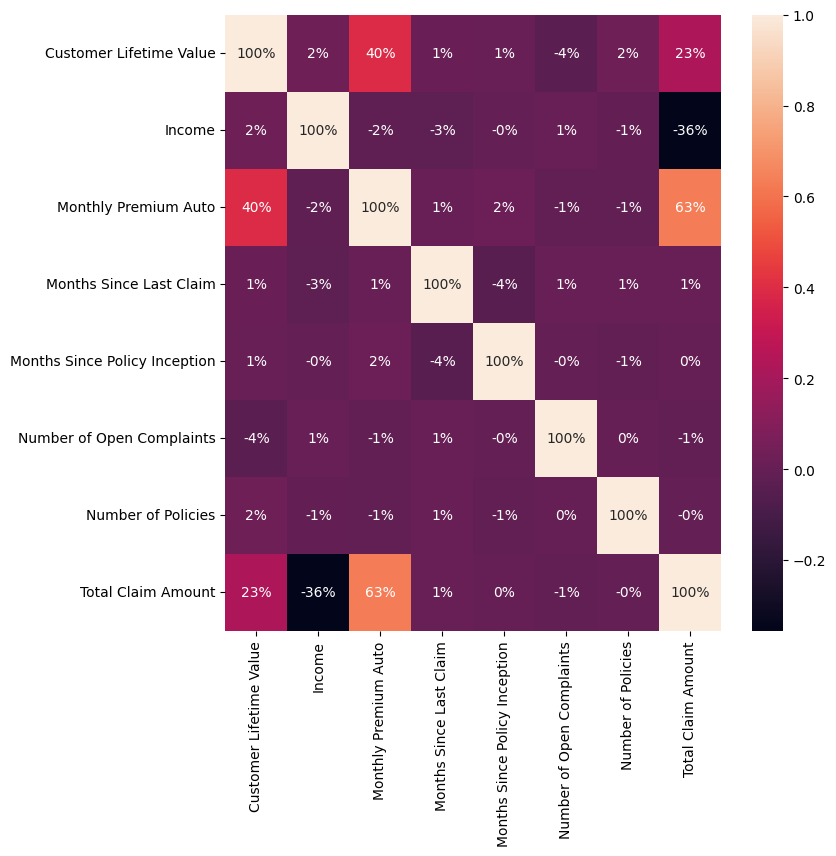

In [107]:
#Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, fmt = '.0%')

Showing the relation with numerical columns and Dependent Variable

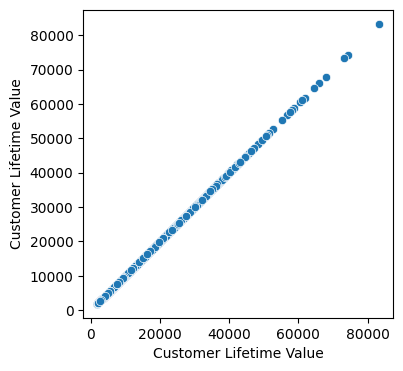

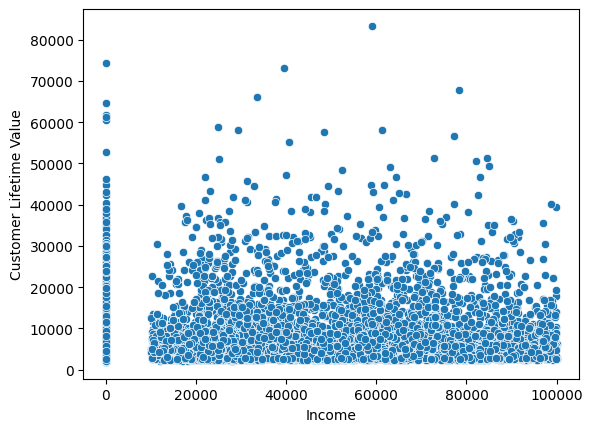

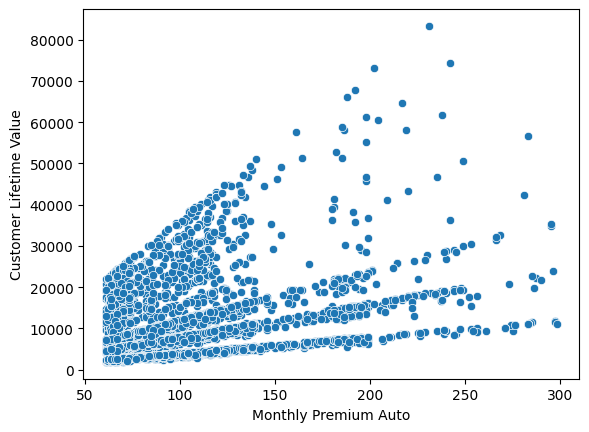

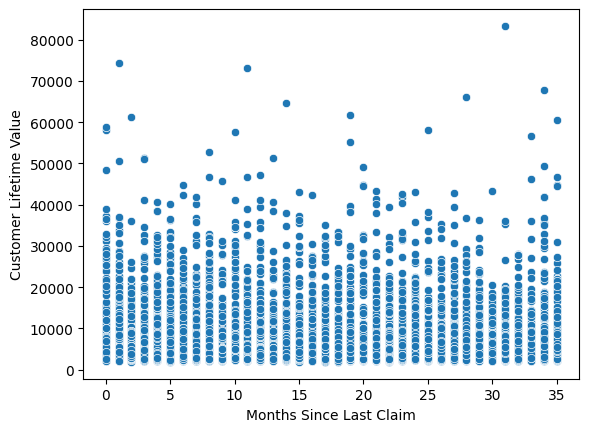

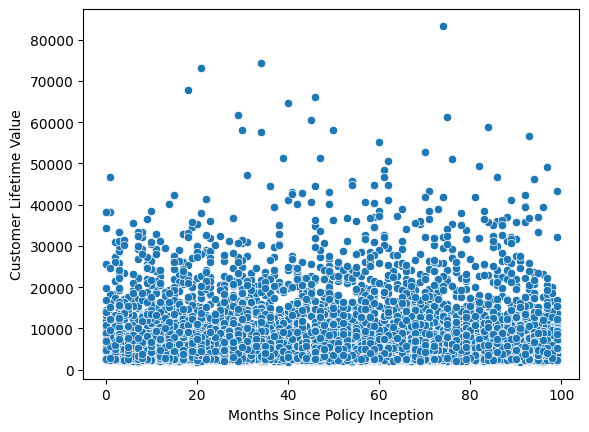

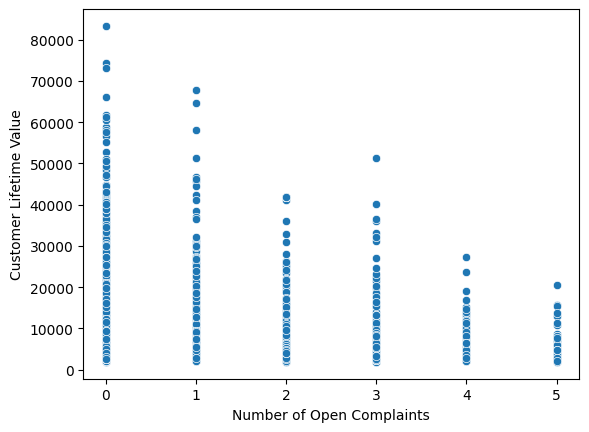

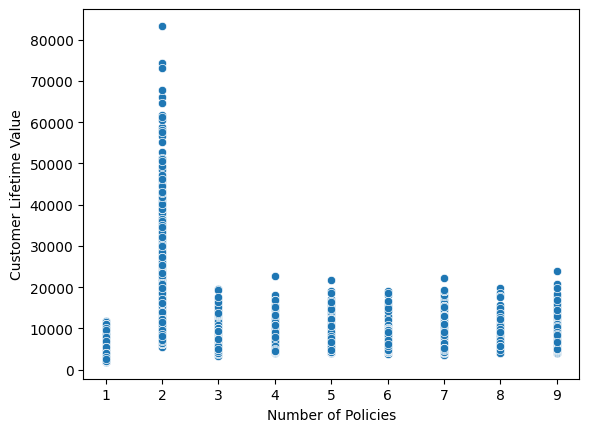

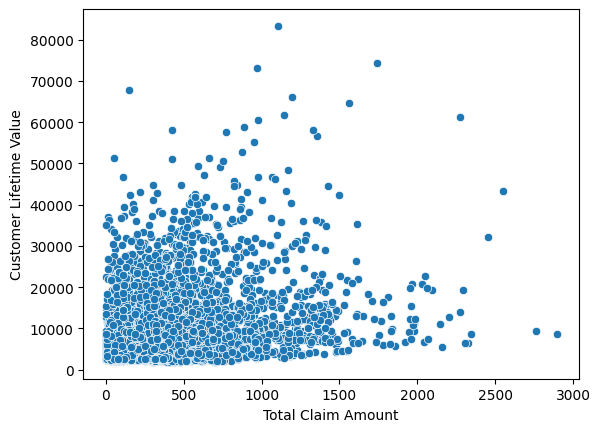

In [108]:
plt.figure(figsize=(4,4))
for i in numerical_columns:
    sns.scatterplot(data=df, x = i, y=df['Customer Lifetime Value'])
    sns.color_palette("Set1")
    print("\n")
    plt.show()

Showing the outliers of Employment Status w.r.t Dependent Variable

<Axes: xlabel='EmploymentStatus', ylabel='Customer Lifetime Value'>

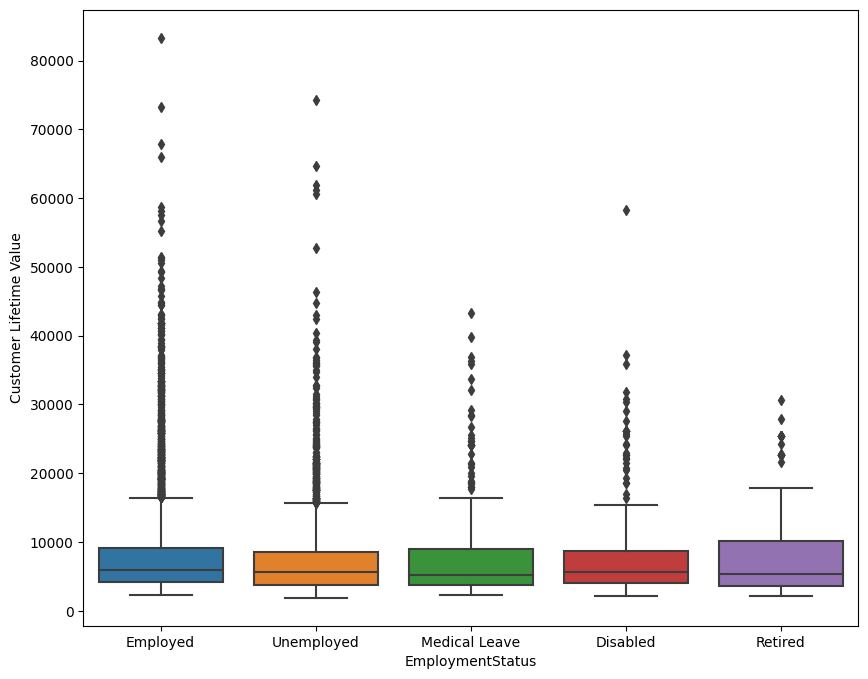

In [109]:
plt.figure(figsize=(10,8))
sns.boxplot(x='EmploymentStatus',y='Customer Lifetime Value',data=df)

Showing the distribution of Education w.rt Dependent variable

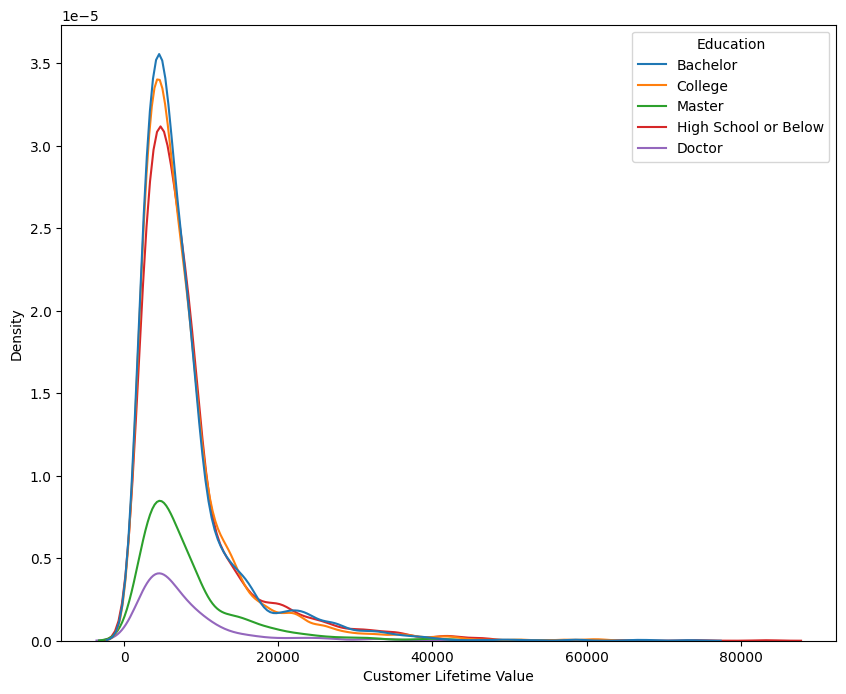

In [110]:
plt.figure(figsize=(10,8))
sns.kdeplot(hue=df['Education'],x='Customer Lifetime Value',data=df)
plt.show()

In [111]:
df[categorical_columns].head(5)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Showing the outliers for Numerical Columns

In [112]:
for i in numerical_columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_value = q1 - (1.5*IQR)
    higher_value = q3 + (1.5*IQR)
    count = df[df[i]  < lower_value].shape[0]
    count +=df[df[i] > higher_value].shape[0]
    if(count > 0):
        outliers_in_percentage = count/df[i].shape[0]
        print(f"% of outliers in {i} is {outliers_in_percentage*100}")

% of outliers in Customer Lifetime Value is 8.944602583753012
% of outliers in Monthly Premium Auto is 4.707685570396322
% of outliers in Number of Open Complaints is 20.604335449967156
% of outliers in Number of Policies is 4.554412086708999
% of outliers in Total Claim Amount is 4.959492007882636


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Feature Engineering

In [114]:
data = df.copy()
data['Customer Lifetime Value']

Q1 = data['Customer Lifetime Value'].quantile(0.25)
Q3 = data['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5*IQR)
higher_value = Q3 + (1.5*IQR)
print(f"lower value for CLV is {round(lower_value)}")
print(F"higher value fpr CLV is {round(higher_value)}")

lower value for CLV is -3458
higher value fpr CLV is 16414


We are eleminating the outliers of the Dependent variable

In [115]:
new_Data=data [(data['Customer Lifetime Value'] > lower_value) & (data['Customer Lifetime Value'] < higher_value)]

In [116]:
Q1 = new_Data['Customer Lifetime Value'].quantile(0.25)
Q3 = new_Data['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5*IQR)
higher_value = Q3 + (1.5*IQR)
print(f"lower value for CLV is {round(lower_value)}")
print(F"higher value fpr CLV is {round(higher_value)}")

lower value for CLV is -2877
higher value fpr CLV is 14786


In [117]:
lower_value

-2877.0465169999998

<Axes: >

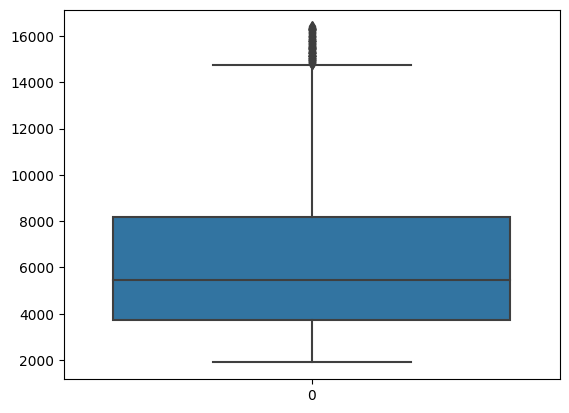

In [118]:
sns.boxplot(new_Data['Customer Lifetime Value'])

In [119]:
new_Data.shape

(8317, 24)

We are removing the Efeective to Date and converting them to Day,Month,Year

In [120]:
new_Data['Effective To Date']
new_Data['Effective To Date'] = pd.to_datetime(new_Data['Effective To Date'])
new_Data['month'] = new_Data['Effective To Date'].dt.month
new_Data['year'] = new_Data['Effective To Date'].dt.year
new_Data['day'] = new_Data['Effective To Date'].dt.day
new_Data = new_Data.drop('Effective To Date',axis=1)




In [121]:
updated_numerical_columns = new_Data.columns[new_Data.dtypes !='object']
updated_categorical_columns = new_Data.columns[new_Data.dtypes =='object']
updated_numerical_columns
new_df_numerical= new_Data[updated_numerical_columns]
new_df_numerical
updated_numerical_columns
updated_categorical_columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Checking the Multicollinearity using VIF score

In [122]:
## scaling the data while calculating vif score
def vif_score(data,col):
    y = data[col]
    X = data.drop([col],axis=1)
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X)
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
    vif["Features"] = X.columns
    return vif

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

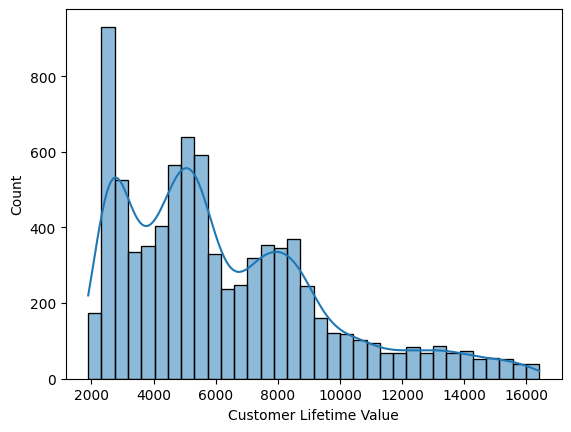

In [123]:
sns.histplot(new_df_numerical['Customer Lifetime Value'],kde=True)

In [151]:
new_Data['Customer Lifetime Value'].skew()

3.0322802599299847

We have converting the Dependant variable using log function to have the Normal Distribution and reduce the skewness

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

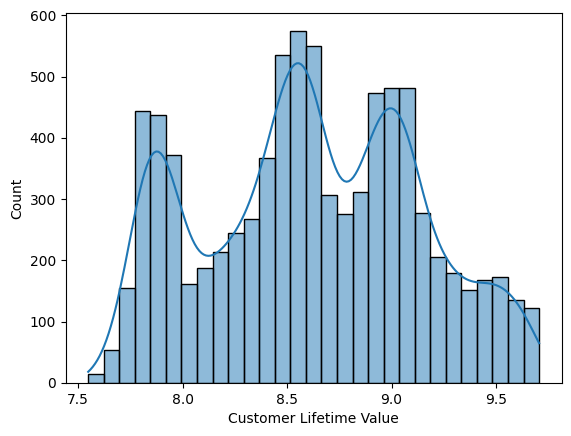

In [125]:
new_df_numerical['Customer Lifetime Value'] = np.log(new_df_numerical['Customer Lifetime Value'])
sns.histplot(new_df_numerical['Customer Lifetime Value'],kde=True)

In [126]:
new_df['Customer Lifetime Value'].skew()

0.016433103612982225

In [127]:
new_df_categorical = new_Data[updated_categorical_columns]
new_df_categorical  = new_df_categorical.drop('Customer',axis=1)
new_df_categorical.head(5)


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [128]:
new_df = pd.concat([new_df_numerical,new_df_categorical],axis=1)

In [129]:
new_df.shape

(8317, 25)

In [130]:
new_df = pd.get_dummies(new_df,columns = ['State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],drop_first=1)
new_df_categorical.shape

(8317, 14)

In [131]:
new_df.shape

(8317, 54)

Checking VIF score after converting the columns using dummies

In [132]:
vif_score(new_df.drop(columns='year'),'Customer Lifetime Value')

,VIF,Features
0,3.199656,Income
1,25.187553,Monthly Premium Auto
2,1.011521,Months Since Last Claim
3,1.022708,Months Since Policy Inception
4,1.010265,Number of Open Complaints
5,1.023601,Number of Policies
6,4.294852,Total Claim Amount
7,1.961364,month
8,1.960483,day
9,1.870108,State_California


In [133]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 9133
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         8317 non-null   float64
 1   Income                          8317 non-null   int64  
 2   Monthly Premium Auto            8317 non-null   int64  
 3   Months Since Last Claim         8317 non-null   int64  
 4   Months Since Policy Inception   8317 non-null   int64  
 5   Number of Open Complaints       8317 non-null   int64  
 6   Number of Policies              8317 non-null   int64  
 7   Total Claim Amount              8317 non-null   float64
 8   month                           8317 non-null   int64  
 9   year                            8317 non-null   int64  
 10  day                             8317 non-null   int64  
 11  State_California                8317 non-null   uint8  
 12  State_Nevada                    83

In [134]:
new_df.head(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month,year,day,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,7.924260,56274,69,32,5,0,1,384.811147,2,2011,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,8.850738,0,94,13,42,0,8,1131.464935,1,2011,31,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,9.464008,48767,108,18,38,0,2,566.472247,2,2011,19,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,8.941920,0,106,18,65,0,7,529.881344,1,2011,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,7.942253,43836,73,12,44,0,1,138.130879,3,2011,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Applying ML alogorithms

In [135]:
X = new_df.drop('Customer Lifetime Value',axis=1)
y = new_df['Customer Lifetime Value']

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [137]:
## Training the model
models={
    'Linear Regression': LinearRegression(),
    'Linear Regression(Ridge)': Ridge(),
    'Linear Regression(lasso)': Lasso(),
    'Support vector Regression': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'KNeighborsRegressor' : KNeighborsRegressor()
}

In [138]:
for model_name,model in models.items():
    model.fit(X_train,y_train)
    print(model_name,'trained')

Linear Regression trained
Linear Regression(Ridge) trained
Linear Regression(lasso) trained
Support vector Regression trained
DecisionTreeRegressor trained
Random Forest Regressor trained
AdaBoostRegressor trained
GradientBoostingRegressor trained
KNeighborsRegressor trained


In [139]:
## Calculating RMSE score for each model

for model_name,model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(model_name,"RMSE: {:.2f}".format(rmse))

Linear Regression RMSE: 0.41
Linear Regression(Ridge) RMSE: 0.41
Linear Regression(lasso) RMSE: 0.46
Support vector Regression RMSE: 0.50
DecisionTreeRegressor RMSE: 0.11
Random Forest Regressor RMSE: 0.08
AdaBoostRegressor RMSE: 0.14
GradientBoostingRegressor RMSE: 0.08
KNeighborsRegressor RMSE: 0.50


In [140]:
for model_name,model in models.items():

    print(model_name)
    print("Train Scores")
    adj_r2 = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(X_train, y_train)))

    print("Test Scores")
    adj_r2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(X_test, y_test)))

Linear Regression
Train Scores
    Accuracy Score: 0.37
    r2: 0.37
Test Scores
    Accuracy Score: 0.35
    r2: 0.36
Linear Regression(Ridge)
Train Scores
    Accuracy Score: 0.37
    r2: 0.37
Test Scores
    Accuracy Score: 0.35
    r2: 0.36
Linear Regression(lasso)
Train Scores
    Accuracy Score: 0.20
    r2: 0.21
Test Scores
    Accuracy Score: 0.19
    r2: 0.21
Support vector Regression
Train Scores
    Accuracy Score: 0.02
    r2: 0.03
Test Scores
    Accuracy Score: 0.01
    r2: 0.03
DecisionTreeRegressor
Train Scores
    Accuracy Score: 1.00
    r2: 1.00
Test Scores
    Accuracy Score: 0.95
    r2: 0.96
Random Forest Regressor
Train Scores
    Accuracy Score: 1.00
    r2: 1.00
Test Scores
    Accuracy Score: 0.98
    r2: 0.98
AdaBoostRegressor
Train Scores
    Accuracy Score: 0.93
    r2: 0.93
Test Scores
    Accuracy Score: 0.92
    r2: 0.93
GradientBoostingRegressor
Train Scores
    Accuracy Score: 0.98
    r2: 0.98
Test Scores
    Accuracy Score: 0.98
    r2: 0.98
KNeighbo

Applying ML Algorithms using GridSearchCV

In [141]:
LinearRegressionParam =  {'fit_intercept' : [True,False],'positive' : [True,False]}

RidgeRegressionParam = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}

LassoRegressionParam = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}


SVRParam = {'C': [0.1, 1, 10, 100, 1000]}

DecisionTreeParam = {"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}
RandomForestParam = {'max_depth': [1, 2, 3, 4],
                    'n_estimators': [100, 150, 200, 250, 300]}
AdaBoostParam = {'n_estimators'  : [1,2,5,10,40,50],
                  'learning_rate' : [0.2,0.5,1,2,5]}

GradientBoostParam = {
                       'n_estimators'  : [1,2,5,10,20,30,40,50],
                       'max_depth'  : [1,2,5,10,20,30]}

KNeighborsParam = {'weights' : ['uniform', 'distance',None],
                    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'n_neighbors' : list(range(2,20))
                    }



Linear Regression using GridSearchCV

In [142]:
LinearRegressioncv = GridSearchCV(estimator=models['Linear Regression'],cv=5,scoring = 'neg_mean_squared_error',param_grid=LinearRegressionParam)
LinearRegressioncv.fit(X_train,y_train)

print(LinearRegressioncv.best_params_)
print(LinearRegressioncv.best_estimator_)

#from sklearn.linear_model import LinearRegression
Regression = LinearRegression(fit_intercept = False, positive = False)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("LinearRegression","RMSE: {:.2f}".format(rmse))

print("LinearRegression")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("    Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("LinearRegression")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("    Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_test, y_test)))



{'fit_intercept': False, 'positive': False}
LinearRegression(fit_intercept=False)
LinearRegression RMSE: 0.41
LinearRegression
Train Scores
    Accuracy Score: 0.37
    r2: 0.37
LinearRegression
    Accuracy Score: 0.35
    r2: 0.36


Ridge Regression using GridSearchCV

In [143]:
RidgeRegressioncv = GridSearchCV(estimator=models['Linear Regression(Ridge)'],cv=5,scoring = 'neg_mean_squared_error',param_grid=RidgeRegressionParam )
RidgeRegressioncv.fit(X_train,y_train)


Regression = Ridge(alpha=50)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RidgeRegression","RMSE: {:.2f}".format(rmse))

print("RidgeRegression")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("    Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("RidgeRegression")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("    Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_test, y_test)))

print(RidgeRegressioncv.best_params_)
print(RidgeRegressioncv.best_estimator_)

RidgeRegression RMSE: 0.41
RidgeRegression
Train Scores
    Accuracy Score: 0.37
    r2: 0.37
RidgeRegression
    Accuracy Score: 0.35
    r2: 0.36
{'alpha': 50}
Ridge(alpha=50)


Lasso Regression using GridSearchCV

In [144]:
LassoRegressioncv = GridSearchCV(estimator=models['Linear Regression(lasso)'],cv=5,scoring = 'neg_mean_squared_error',param_grid=LassoRegressionParam )
LassoRegressioncv.fit(X_train,y_train)

from sklearn.linear_model import Lasso
Regression = Lasso(alpha=0.001)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("LassoRegression","RMSE: {:.2f}".format(rmse))

print("LassoRegression")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("LassoRegression")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_test, y_test)))



print(LassoRegressioncv.best_params_)
print(LassoRegressioncv.best_estimator_)

LassoRegression RMSE: 0.41
LassoRegression
Train Scores
Accuracy Score: 0.37
    r2: 0.37
LassoRegression
Accuracy Score: 0.35
    r2: 0.36
{'alpha': 0.001}
Lasso(alpha=0.001)


SVR  using GridSearchCV

In [145]:
SVRRegressioncv = GridSearchCV(estimator=models['Support vector Regression'],cv=5,scoring = 'neg_mean_squared_error',param_grid=SVRParam )
SVRRegressioncv.fit(X_train,y_train)

from sklearn.svm import SVR
Regression = SVR(C = 1000)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("SVRRegression","RMSE: {:.2f}".format(rmse))

print("SVRRegression")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("    Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("SVRRegression")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("    Accuracy Score: {:.2f}".format(adj_r2))
print("    r2: {:.2f}".format(Regression.score(X_test, y_test)))



print(SVRRegressioncv.best_params_)
print(SVRRegressioncv.best_estimator_)

SVRRegression RMSE: 0.46
SVRRegression
Train Scores
    Accuracy Score: 0.19
    r2: 0.19
SVRRegression
    Accuracy Score: 0.17
    r2: 0.19
{'C': 1000}
SVR(C=1000)


DecisionTree Regression using GridSearchCV

In [146]:
DecisionTreeRegressioncv = GridSearchCV(estimator=models['DecisionTreeRegressor'],cv=3,scoring = 'neg_mean_squared_error',param_grid=DecisionTreeParam )
DecisionTreeRegressioncv.fit(X_train,y_train)
from sklearn.tree import DecisionTreeRegressor

Regression = DecisionTreeRegressor(max_depth = 9, min_samples_leaf= 10)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("DecisionTreeRegressor","RMSE: {:.2f}".format(rmse))

print("DecisionTreeRegressor")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("DecisionTreeRegressor")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_test, y_test)))



print(DecisionTreeRegressioncv.best_params_)
print(DecisionTreeRegressioncv.best_estimator_)

DecisionTreeRegressor RMSE: 0.09
DecisionTreeRegressor
Train Scores
Accuracy Score: 0.98
r2: 0.98
DecisionTreeRegressor
Accuracy Score: 0.97
r2: 0.97
{'max_depth': 9, 'min_samples_leaf': 10}
DecisionTreeRegressor(max_depth=9, min_samples_leaf=10)


RandomForest using GridSearchCV

In [147]:
RandomForestRegressioncv = GridSearchCV(estimator=models['Random Forest Regressor'],cv=3,scoring = 'neg_mean_squared_error',param_grid=RandomForestParam )
RandomForestRegressioncv.fit(X_train,y_train)
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
Regression = RandomForestRegressor(max_depth = 4, n_estimators = 4)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RandomForestRegressor","RMSE: {:.2f}".format(rmse))

print("RandomForestRegressor")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("RandomForestRegressor")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_test, y_test)))


print(RandomForestRegressioncv.best_params_)
print(RandomForestRegressioncv.best_estimator_)


RandomForestRegressor RMSE: 0.11
RandomForestRegressor
Train Scores
Accuracy Score: 0.95
r2: 0.95
RandomForestRegressor
Accuracy Score: 0.95
r2: 0.95
{'max_depth': 4, 'n_estimators': 200}
RandomForestRegressor(max_depth=4, n_estimators=200)


AdaBoost using GridSearchCV

In [148]:
AdaBoostRegressioncv = GridSearchCV(estimator=models['AdaBoostRegressor'],cv=5,scoring = 'neg_mean_squared_error',param_grid=AdaBoostParam)
AdaBoostRegressioncv.fit(X_train,y_train)

Regression = AdaBoostRegressor(learning_rate = 1, n_estimators = 40)
Regression.fit(X_train,y_train)
y_pred = Regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("AdaBoostRegressor","RMSE: {:.2f}".format(rmse))

print("AdaBoostRegressor")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("AdaBoostRegressor")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_test, y_test)))

print(AdaBoostRegressioncv.best_params_)
print(AdaBoostRegressioncv.best_estimator_)

AdaBoostRegressor RMSE: 0.14
AdaBoostRegressor
Train Scores
Accuracy Score: 0.93
r2: 0.93
AdaBoostRegressor
Accuracy Score: 0.92
r2: 0.93
{'learning_rate': 2, 'n_estimators': 50}
AdaBoostRegressor(learning_rate=2)


Gradient Boosting using Regression

In [149]:
GradientBoostingRegressioncv = GridSearchCV(estimator=models['GradientBoostingRegressor'],cv=3,scoring = 'neg_mean_squared_error',param_grid=GradientBoostParam)
GradientBoostingRegressioncv.fit(X_train,y_train)

Regression = GradientBoostingRegressor(max_depth = 5, n_estimators = 50)
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("GradientBoostingRegressor","RMSE: {:.2f}".format(rmse))

print("GradientBoostingRegressor")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("GradientBoostingRegressor")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_test, y_test)))


print(GradientBoostingRegressioncv.best_params_)
print(GradientBoostingRegressioncv.best_estimator_)

GradientBoostingRegressor RMSE: 0.08
GradientBoostingRegressor
Train Scores
Accuracy Score: 0.98
r2: 0.98
GradientBoostingRegressor
Accuracy Score: 0.98
r2: 0.98
{'max_depth': 5, 'n_estimators': 50}
GradientBoostingRegressor(max_depth=5, n_estimators=50)


KNeighbors using GridSearch CV

In [150]:
KNeighborsRegressorcv = GridSearchCV(estimator=models['KNeighborsRegressor'],cv=3,scoring = 'neg_mean_squared_error',param_grid=KNeighborsParam)
KNeighborsRegressorcv.fit(X_train,y_train)

Regression = KNeighborsRegressor(algorithm = 'ball_tree', n_neighbors = 19, weights = 'distance')
Regression.fit(X_train,y_train)
y_pred = Regression .predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("KNeighborsRegressor","RMSE: {:.2f}".format(rmse))

print("KNeighborsRegressor")
print("Train Scores")
adj_r2 = 1 - (1-Regression.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_train, y_train)))

print("KNeighborsRegressor")
adj_r2 = 1 - (1-Regression.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Accuracy Score: {:.2f}".format(adj_r2))
print("r2: {:.2f}".format(Regression.score(X_test, y_test)))


print(KNeighborsRegressorcv.best_params_)
print(KNeighborsRegressorcv.best_estimator_)


KNeighborsRegressor RMSE: 0.47
KNeighborsRegressor
Train Scores
Accuracy Score: 1.00
r2: 1.00
KNeighborsRegressor
Accuracy Score: 0.14
r2: 0.16
{'algorithm': 'ball_tree', 'n_neighbors': 19, 'weights': 'distance'}
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=19, weights='distance')
